# Advertisement Click Prediction
    


### Contents
1]  Importing libraries and dataset
2]  Data Preprocessing
3] Prediction Models
    - Logistic Regression
    - Decision Tree Classifier
    - Random Forest Classifier
    - Naive Bayes
    - KNN
    - Support Vector Machine
    - Gradient Boosting
    - AdaBoosting Classifier
    - MLP Classifier
    - XgBoosting Classifer
4] Model Comparison
5] Conclusion

### 1] Importing required libraries and Dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler



In [2]:
file  = "./DataSets/Advertisement Click Prediction.csv"
df = pd.read_csv(file)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
print("Inspect for missing values:\n", df.isna().sum())

Inspect for missing values:
 User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


**Plotting the attributes to showcase the dataset**

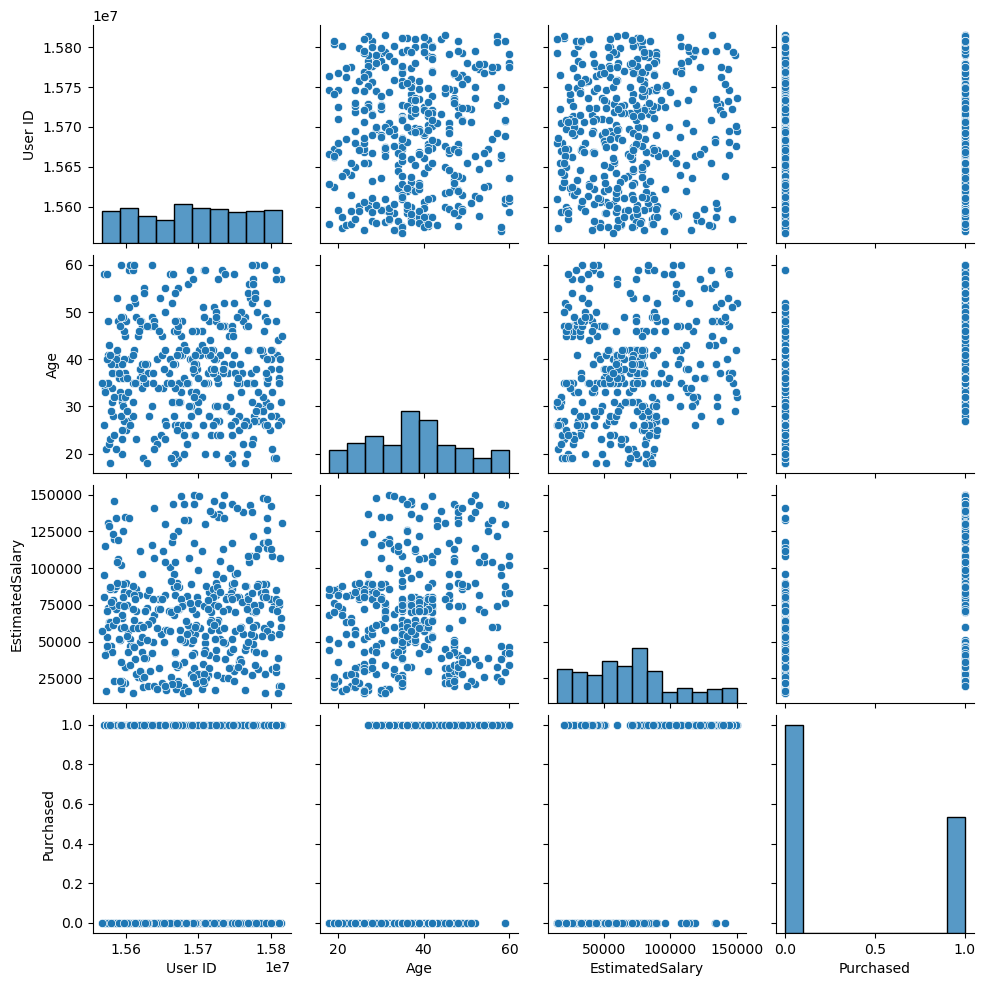

In [4]:
sns.pairplot(df)

### Data Preprocessing
Data preprocessing is an important step in the data mining process. The phrase " is particularly applicable to data mining and machine learning projects. Data-gathering methods are often loosely controlled, resulting in out-of-range values, impossible data combinations, and missing values, etc.

In [5]:
# Identify any columns with categorical values
categorical_columns = [col for col in df.columns  if df[col].dtypes == 'object']

print("categorical_columns:", categorical_columns)

categorical_columns: ['Gender']


In [6]:
# Convert Categorical values in to numerical values
df['Sex'] = pd.get_dummies(df['Gender'] , drop_first = True)
# df['Sex'] = Sex
df = df.drop('Gender' , axis =1)


In [7]:
# Scale the data
ss = StandardScaler()
ss.fit(df.drop('Purchased', axis =1 ))

StandardScaler()

In [8]:
scaled_featured = ss.transform( df.drop('Purchased', axis =1 ))

In [9]:
scale = pd.DataFrame( scaled_featured , columns = df.columns[:-1])

In [10]:
scale['Sex'] = scale['Purchased']

In [11]:
scale = scale.drop('Purchased'  ,axis =1)

In [12]:
scale

,User ID,Age,EstimatedSalary,Sex
0,-0.936579,-1.781797,-1.490046,1.020204
1,1.668387,-0.253587,-1.460681,1.020204
2,-0.320877,-1.113206,-0.785290,-0.980196
3,-1.233692,-1.017692,-0.374182,-0.980196
4,1.571389,-1.781797,0.183751,1.020204
...,...,...,...,...
395,0.004517,0.797057,-0.844019,-0.980196
396,0.203039,1.274623,-1.372587,1.020204
397,-0.520392,1.179110,-1.460681,-0.980196
398,0.886955,-0.158074,-1.078938,1.020204


### Splitting the data into train and test data
  
 

In [13]:
from sklearn.model_selection import train_test_split
X_train  ,X_test , y_train , y_test = train_test_split(scale , df['Purchased'] , test_size = 0.3 , random_state = 50)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

Models, Accuracy_score = [], []

### K-Nearest Neighbour Algorithm

In [15]:
knn = KNeighborsClassifier( n_neighbors = 5)
knn.fit(X_train , y_train)

pred = knn.predict(X_test)
print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('knn')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[77  3]
 [ 6 34]]
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94        80
           1       0.92      0.85      0.88        40

    accuracy                           0.93       120
   macro avg       0.92      0.91      0.91       120
weighted avg       0.92      0.93      0.92       120



C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

pred = dtc.predict(X_test)
print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('dtc')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[76  4]
 [13 27]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90        80
           1       0.87      0.68      0.76        40

    accuracy                           0.86       120
   macro avg       0.86      0.81      0.83       120
weighted avg       0.86      0.86      0.85       120



### Random Forest 

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=225,random_state=1)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('RF')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[76  4]
 [ 6 34]]
classification_report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        80
           1       0.89      0.85      0.87        40

    accuracy                           0.92       120
   macro avg       0.91      0.90      0.91       120
weighted avg       0.92      0.92      0.92       120



### Gausian Naive Bayes Classifier Algorithm


In [18]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
pred = nb.predict(X_test)

print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('GNB')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[76  4]
 [10 30]]
classification_report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92        80
           1       0.88      0.75      0.81        40

    accuracy                           0.88       120
   macro avg       0.88      0.85      0.86       120
weighted avg       0.88      0.88      0.88       120



### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)

print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('Log Reg')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[77  3]
 [13 27]]
classification_report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91        80
           1       0.90      0.68      0.77        40

    accuracy                           0.87       120
   macro avg       0.88      0.82      0.84       120
weighted avg       0.87      0.87      0.86       120



### SVM Classification

In [20]:
from sklearn.svm import SVC
svc=SVC(random_state=1)
svc.fit(X_train,y_train)
pred = svc.predict(X_test)

print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('SVM')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[75  5]
 [ 5 35]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        80
           1       0.88      0.88      0.88        40

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



### Gradient Boosting Algorithm

In [21]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(X_train,y_train)
pred = gfc.predict(X_test)

print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('GB')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[74  6]
 [ 7 33]]
classification_report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        80
           1       0.85      0.82      0.84        40

    accuracy                           0.89       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.89      0.89      0.89       120



### AdaBoost Algorithm

In [22]:
abc=AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(X_train,y_train)
pred = abc.predict(X_test)

print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('Ada')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[77  3]
 [14 26]]
classification_report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        80
           1       0.90      0.65      0.75        40

    accuracy                           0.86       120
   macro avg       0.87      0.81      0.83       120
weighted avg       0.86      0.86      0.85       120



### Artificial Neural Networks Algorithm

In [23]:
ysa=MLPClassifier(alpha=1, max_iter=1000)
ysa.fit(X_train,y_train)
pred = ysa.predict(X_test)

print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('ANN')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[76  4]
 [ 5 35]]
classification_report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94        80
           1       0.90      0.88      0.89        40

    accuracy                           0.93       120
   macro avg       0.92      0.91      0.92       120
weighted avg       0.92      0.93      0.92       120



### XGBoost classifier

In [24]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)

pred = model.predict(X_test)


print("confusion_matrix:\n",  confusion_matrix (y_test , pred))
print( "classification_report:\n", classification_report(y_test , pred))

Models.append('XG')
Accuracy_score.append(accuracy_score(y_test, pred))

confusion_matrix:
 [[75  5]
 [ 8 32]]
classification_report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92        80
           1       0.86      0.80      0.83        40

    accuracy                           0.89       120
   macro avg       0.88      0.87      0.88       120
weighted avg       0.89      0.89      0.89       120



In [25]:
Results = pd.DataFrame({'Model': Models,
                      'Accuracy_score': Accuracy_score})
Results

,Model,Accuracy_score
0,knn,0.925000
1,dtc,0.858333
2,RF,0.916667
3,GNB,0.883333
4,Log Reg,0.866667
5,SVM,0.916667
6,GB,0.891667
7,Ada,0.858333
8,ANN,0.925000
9,XG,0.891667
